In [1]:
from keras import optimizers, regularizers
from keras.layers import Dense, Dropout, Input
from keras.models import Model, Sequential
from random import shuffle
from scipy import interp
from scipy.stats.mstats import gmean
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import QuantileTransformer
import contextlib
import glob
import gzip
import h5py
import keras
import numpy as np
import os
import pandas as pd
import pylab as plt
import random
import scipy
import sklearn
import tensorflow as tf
random_state = np.random.RandomState(0)

Using TensorFlow backend.


In [2]:
X_f = '/home/drewe/notebooks/genotox/GenoTox-database.csv'
y_f = '/home/drewe/notebooks/genotox/outcome-mod-2.csv'

X = pd.read_csv(X_f).values[:,:-1]
y = pd.read_csv(y_f).values


ix = [i for i in range(y.shape[0])]
shuffle(ix)
X  = X[ix, :]
y = y[ix]
names = pd.read_csv(X_f)['Unnamed: 0'][ix].values
X = sklearn.preprocessing.quantile_transform(X, axis=1, output_distribution='uniform', copy=True)
y = y[: ,0]



In [9]:
y

array([1, 1, 1, ..., 0, 1, 0])

>>
.
Epoch 1/50
6463/6463 [==============================] - 0s 37us/step - loss: 0.6010 - acc: 0.6613
Epoch 2/50
6463/6463 [==============================] - 0s 36us/step - loss: 0.6027 - acc: 0.6632
Epoch 3/50
6463/6463 [==============================] - 0s 39us/step - loss: 0.6014 - acc: 0.6574
Epoch 4/50
6463/6463 [==============================] - 0s 37us/step - loss: 0.6109 - acc: 0.6495
Epoch 5/50
6463/6463 [==============================] - 0s 36us/step - loss: 0.6017 - acc: 0.6611
Epoch 6/50
6463/6463 [==============================] - 0s 37us/step - loss: 0.6013 - acc: 0.6618
Epoch 7/50
6463/6463 [==============================] - 0s 37us/step - loss: 0.5984 - acc: 0.6619
Epoch 8/50
6463/6463 [==============================] - 0s 37us/step - loss: 0.6002 - acc: 0.6593
Epoch 9/50
6463/6463 [==============================] - 0s 37us/step - loss: 0.5917 - acc: 0.6693
Epoch 10/50
6463/6463 [==============================] - 0s 38us/step - loss: 0.5908 - acc: 0.6681
Epoch 11/50
64

Epoch 16/50
6463/6463 [==============================] - 0s 38us/step - loss: 0.5775 - acc: 0.6830
Epoch 17/50
6463/6463 [==============================] - 0s 37us/step - loss: 0.5779 - acc: 0.6802
Epoch 18/50
6463/6463 [==============================] - 0s 37us/step - loss: 0.5695 - acc: 0.6856
Epoch 19/50
6463/6463 [==============================] - 0s 38us/step - loss: 0.5716 - acc: 0.6878
Epoch 20/50
6463/6463 [==============================] - 0s 37us/step - loss: 0.5741 - acc: 0.6833
Epoch 21/50
6463/6463 [==============================] - 0s 37us/step - loss: 0.5654 - acc: 0.6987
Epoch 22/50
6463/6463 [==============================] - 0s 37us/step - loss: 0.5621 - acc: 0.7006
Epoch 23/50
6463/6463 [==============================] - 0s 37us/step - loss: 0.5664 - acc: 0.6892
Epoch 24/50
6463/6463 [==============================] - 0s 38us/step - loss: 0.5595 - acc: 0.7004
Epoch 25/50
6463/6463 [==============================] - 0s 37us/step - loss: 0.5622 - acc: 0.6981
Epoch 26/5

6463/6463 [==============================] - 0s 37us/step - loss: 0.5725 - acc: 0.6960
Epoch 31/50
6463/6463 [==============================] - 0s 36us/step - loss: 0.5682 - acc: 0.6947
Epoch 32/50
6463/6463 [==============================] - 0s 37us/step - loss: 0.5688 - acc: 0.6924
Epoch 33/50
6463/6463 [==============================] - 0s 36us/step - loss: 0.5618 - acc: 0.7051
Epoch 34/50
6463/6463 [==============================] - 0s 36us/step - loss: 0.5713 - acc: 0.6952
Epoch 35/50
6463/6463 [==============================] - 0s 36us/step - loss: 0.5629 - acc: 0.6995
Epoch 36/50
6463/6463 [==============================] - 0s 36us/step - loss: 0.5639 - acc: 0.7048
Epoch 37/50
6463/6463 [==============================] - 0s 36us/step - loss: 0.5628 - acc: 0.6964
Epoch 38/50
6463/6463 [==============================] - 0s 36us/step - loss: 0.5609 - acc: 0.6969
Epoch 39/50
6463/6463 [==============================] - 0s 36us/step - loss: 0.5579 - acc: 0.7054
Epoch 40/50
6463/6463 

Epoch 13/50
6463/6463 [==============================] - 0s 37us/step - loss: 0.5920 - acc: 0.6774
Epoch 14/50
6463/6463 [==============================] - 0s 38us/step - loss: 0.5857 - acc: 0.6808
Epoch 15/50
6463/6463 [==============================] - 0s 37us/step - loss: 0.5871 - acc: 0.6808
Epoch 16/50
6463/6463 [==============================] - 0s 37us/step - loss: 0.5875 - acc: 0.6819
Epoch 17/50
6463/6463 [==============================] - 0s 38us/step - loss: 0.5912 - acc: 0.6774
Epoch 18/50
6463/6463 [==============================] - 0s 37us/step - loss: 0.5874 - acc: 0.6837
Epoch 19/50
6463/6463 [==============================] - 0s 37us/step - loss: 0.5841 - acc: 0.6828
Epoch 20/50
6463/6463 [==============================] - 0s 37us/step - loss: 0.5760 - acc: 0.6888
Epoch 21/50
6463/6463 [==============================] - 0s 37us/step - loss: 0.5757 - acc: 0.6881
Epoch 22/50
6463/6463 [==============================] - 0s 39us/step - loss: 0.5822 - acc: 0.6822
Epoch 23/5

6464/6464 [==============================] - 0s 36us/step - loss: 0.5731 - acc: 0.6838
Epoch 28/50
6464/6464 [==============================] - 0s 36us/step - loss: 0.5651 - acc: 0.6957
Epoch 29/50
6464/6464 [==============================] - 0s 37us/step - loss: 0.5729 - acc: 0.6838
Epoch 30/50
6464/6464 [==============================] - 0s 36us/step - loss: 0.5745 - acc: 0.6825
Epoch 31/50
6464/6464 [==============================] - 0s 36us/step - loss: 0.5742 - acc: 0.6855
Epoch 32/50
6464/6464 [==============================] - 0s 36us/step - loss: 0.5641 - acc: 0.6969
Epoch 33/50
6464/6464 [==============================] - 0s 37us/step - loss: 0.5574 - acc: 0.7006
Epoch 34/50
6464/6464 [==============================] - 0s 36us/step - loss: 0.5639 - acc: 0.6904
Epoch 35/50
6464/6464 [==============================] - 0s 36us/step - loss: 0.5563 - acc: 0.6997
Epoch 36/50
6464/6464 [==============================] - 0s 37us/step - loss: 0.5528 - acc: 0.7027
Epoch 37/50
6464/6464 

Epoch 10/50
6464/6464 [==============================] - 0s 37us/step - loss: 0.5995 - acc: 0.6686
Epoch 11/50
6464/6464 [==============================] - 0s 38us/step - loss: 0.5954 - acc: 0.6733
Epoch 12/50
6464/6464 [==============================] - 0s 38us/step - loss: 0.5933 - acc: 0.6764
Epoch 13/50
6464/6464 [==============================] - 0s 37us/step - loss: 0.5900 - acc: 0.6795
Epoch 14/50
6464/6464 [==============================] - 0s 37us/step - loss: 0.5904 - acc: 0.6776
Epoch 15/50
6464/6464 [==============================] - 0s 36us/step - loss: 0.5998 - acc: 0.6700
Epoch 16/50
6464/6464 [==============================] - 0s 37us/step - loss: 0.5898 - acc: 0.6782
Epoch 17/50
6464/6464 [==============================] - 0s 37us/step - loss: 0.5895 - acc: 0.6808
Epoch 18/50
6464/6464 [==============================] - 0s 37us/step - loss: 0.5867 - acc: 0.6872
Epoch 19/50
6464/6464 [==============================] - 0s 38us/step - loss: 0.5886 - acc: 0.6805
Epoch 20/5

6465/6465 [==============================] - 0s 38us/step - loss: 0.6244 - acc: 0.6444
Epoch 25/50
6465/6465 [==============================] - 0s 36us/step - loss: 0.6272 - acc: 0.6410
Epoch 26/50
6465/6465 [==============================] - 0s 37us/step - loss: 0.6270 - acc: 0.6461
Epoch 27/50
6465/6465 [==============================] - 0s 36us/step - loss: 0.6260 - acc: 0.6455
Epoch 28/50
6465/6465 [==============================] - 0s 36us/step - loss: 0.6225 - acc: 0.6435
Epoch 29/50
6465/6465 [==============================] - 0s 37us/step - loss: 0.6205 - acc: 0.6427
Epoch 30/50
6465/6465 [==============================] - 0s 37us/step - loss: 0.6285 - acc: 0.6430
Epoch 31/50
6465/6465 [==============================] - 0s 37us/step - loss: 0.6231 - acc: 0.6475
Epoch 32/50
6465/6465 [==============================] - 0s 37us/step - loss: 0.6205 - acc: 0.6506
Epoch 33/50
6465/6465 [==============================] - 0s 37us/step - loss: 0.6224 - acc: 0.6500
Epoch 34/50
6465/6465 

Epoch 39/50
6465/6465 [==============================] - 0s 39us/step - loss: 0.6241 - acc: 0.6435
Epoch 40/50
6465/6465 [==============================] - 0s 38us/step - loss: 0.6213 - acc: 0.6532
Epoch 41/50
6465/6465 [==============================] - 0s 38us/step - loss: 0.6238 - acc: 0.6467
Epoch 42/50
6465/6465 [==============================] - 0s 38us/step - loss: 0.6229 - acc: 0.6487
Epoch 43/50
6465/6465 [==============================] - 0s 38us/step - loss: 0.6305 - acc: 0.6388
Epoch 44/50
6465/6465 [==============================] - 0s 38us/step - loss: 0.6327 - acc: 0.6449
Epoch 45/50
6465/6465 [==============================] - 0s 38us/step - loss: 0.6204 - acc: 0.6521
Epoch 46/50
6465/6465 [==============================] - 0s 38us/step - loss: 0.6220 - acc: 0.6493
Epoch 47/50
6465/6465 [==============================] - 0s 38us/step - loss: 0.6216 - acc: 0.6473
Epoch 48/50
6465/6465 [==============================] - 0s 39us/step - loss: 0.6198 - acc: 0.6515
Epoch 49/5

6465/6465 [==============================] - 0s 38us/step - loss: 0.6322 - acc: 0.6376
Epoch 4/50
6465/6465 [==============================] - 0s 38us/step - loss: 0.6396 - acc: 0.6351
Epoch 5/50
6465/6465 [==============================] - 0s 37us/step - loss: 0.6394 - acc: 0.6303
Epoch 6/50
6465/6465 [==============================] - 0s 37us/step - loss: 0.6327 - acc: 0.6411
Epoch 7/50
6465/6465 [==============================] - 0s 37us/step - loss: 0.6385 - acc: 0.6413
Epoch 8/50
6465/6465 [==============================] - 0s 38us/step - loss: 0.6360 - acc: 0.6319
Epoch 9/50
6465/6465 [==============================] - 0s 37us/step - loss: 0.6367 - acc: 0.6425
Epoch 10/50
6465/6465 [==============================] - 0s 37us/step - loss: 0.6294 - acc: 0.6435
Epoch 11/50
6465/6465 [==============================] - 0s 37us/step - loss: 0.6306 - acc: 0.6444
Epoch 12/50
6465/6465 [==============================] - 0s 37us/step - loss: 0.6323 - acc: 0.6432
Epoch 13/50
6465/6465 [=====

Epoch 36/50
6465/6465 [==============================] - 0s 37us/step - loss: 0.6058 - acc: 0.6653
Epoch 37/50
6465/6465 [==============================] - 0s 38us/step - loss: 0.6165 - acc: 0.6503
Epoch 38/50
6465/6465 [==============================] - 0s 38us/step - loss: 0.6094 - acc: 0.6597
Epoch 39/50
6465/6465 [==============================] - 0s 38us/step - loss: 0.6146 - acc: 0.6543
Epoch 40/50
6465/6465 [==============================] - 0s 39us/step - loss: 0.6110 - acc: 0.6541
Epoch 41/50
6465/6465 [==============================] - 0s 39us/step - loss: 0.6063 - acc: 0.6637
Epoch 42/50
6465/6465 [==============================] - 0s 38us/step - loss: 0.6049 - acc: 0.6668
Epoch 43/50
6465/6465 [==============================] - 0s 39us/step - loss: 0.6032 - acc: 0.6636
Epoch 44/50
6465/6465 [==============================] - 0s 39us/step - loss: 0.6026 - acc: 0.6645
Epoch 45/50
6465/6465 [==============================] - 0s 38us/step - loss: 0.6073 - acc: 0.6647
Epoch 46/5

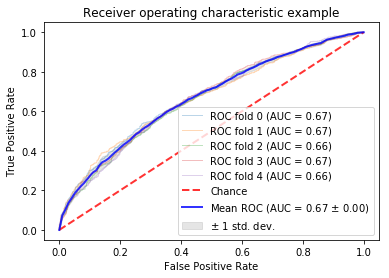

array([0.58053386, 0.84379703, 0.25155956, ..., 0.17350598, 0.7701112 ,
       0.32959276])

In [34]:
cv = StratifiedKFold(n_splits=5)
results = np.zeros_like(y, dtype=float)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    keras.backend.clear_session()
    prbs=[]
    for mod in range(5):
        print('>>')
        curr_try = 0
        while curr_try <10:
            print('.')

            model = Sequential()
            model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
            model.add(Dense(64, activation='relu'))
            model.add(Dense(64, activation='relu'))
            model.add(Dense(64, activation='relu'))
            model.add(Dense(1, activation='sigmoid'))
            # Compile model
            opt = keras.optimizers.Adam(epsilon=None, amsgrad=True)
            model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
            
            # Fit the model
            history = model.fit(X[train,:], y[train], epochs=50, batch_size=64, verbose=0)
            if history.history['acc'][-1] > 0.53:
                break
            else:
                curr_try += 1

        # Fit the model
        model.fit(X[train,:], y[train], epochs=50, batch_size=64, verbose=1)
        
        # evaluate the model
        probas_ = model.predict(X[test,:])
        prbs.append(probas_)
    # Average the predictions
    probas_ = np.mean(np.hstack(prbs), axis=1)
    results[test] = probas_
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[ :])
    print('   ' + str(auc(fpr, tpr)))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
results

In [35]:
df_results = pd.DataFrame(data={"name": names, 'pred': results})
df_results.to_csv('/home/drewe/notebooks/genotox/pred.csv', index=None)

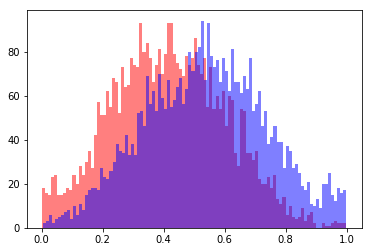

In [36]:
plt.hist(results[y==0],100, color='red', alpha=0.5)
plt.hist(results[y==1],100, color='blue', alpha=0.5)
plt.show()

In [27]:
results[test] = probas_
plt.plot(results)

(8080,)